In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int64) # Iris Setosa?
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
print(y_pred)

[1]


In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
len(X_train)

60000

In [12]:
len(X_test)

10000

In [13]:
X_train[0].shape

(28, 28)

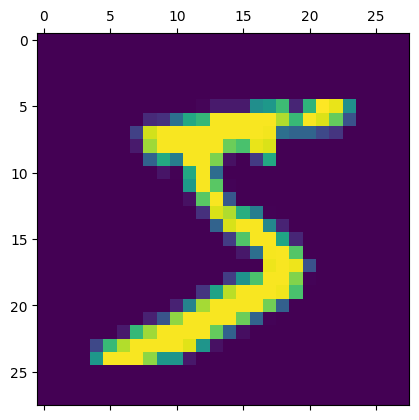

In [14]:
plt.matshow(X_train[0])

In [15]:

y_train[0]

5

In [16]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [18]:
X_train_flattened.shape

(60000, 784)

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8693 - loss: 0.4621
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9611 - loss: 0.1331
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9742 - loss: 0.0874
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9814 - loss: 0.0632
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9849 - loss: 0.0485


In [20]:
model.get_weights()

[array([[-0.04033876,  0.02089673,  0.00825957, ..., -0.07871017,
          0.06234984, -0.03451678],
        [-0.0049725 ,  0.07104316,  0.03454208, ..., -0.04024356,
          0.07599954, -0.02887824],
        [-0.01838918,  0.01435933,  0.02209768, ...,  0.01615573,
         -0.0581001 ,  0.01292858],
        ...,
        [ 0.07894681,  0.01556587, -0.04498168, ..., -0.06772259,
          0.00067182, -0.04565407],
        [-0.01091123,  0.06748274,  0.05903821, ..., -0.04894989,
         -0.07499187, -0.06437246],
        [-0.05068259,  0.0277542 ,  0.07381786, ...,  0.01807404,
         -0.01323543,  0.04580271]], dtype=float32),
 array([-0.00422395,  0.17055762,  0.11023985,  0.12504351, -0.0273775 ,
         0.06694927,  0.04704114,  0.12255917, -0.18511567,  0.02445946,
        -0.00600457,  0.0605706 ,  0.11766392,  0.04287448,  0.10821871,
        -0.03044198,  0.00623462,  0.08083213, -0.02382142,  0.0479713 ,
        -0.02764421, -0.04957289,  0.16879392,  0.16761391,  0.016